# Loan repayment prediction machine learning project

In [58]:
#importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import permutation_test_score , train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV

Importing the dataset

In [2]:
ds = pd.read_csv('C:\\Users\\sasta\\OneDrive\\Desktop\\ML-DL PROJECTS\\Loan_repayment_pred\\loan_data.csv' , sep=';')

'''
 here,  on the inital import of data , it was not divided into seperate proper columns hence used the sep method of the pandas
class using the appropriate character in order to serepate out the features into proper columns!
'''
ds.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,1.135.040.654,19.48,737,5.639.958.333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,1.108.214.255,14.29,707,2760,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,1.037.349.118,11.63,682,4710,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,1.135.040.654,8.10,712,2.699.958.333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,1.129.973.224,14.97,667,4066,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,1.190.496.755,16.98,727,6.120.041.667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,1.071.441.777,4.00,667,3.180.041.667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,1.100.209.984,11.08,722,5116,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,1.140.756.495,17.25,682,3989,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,1.020.359.214,10.00,707,2.730.041.667,5630,23.0,1,0,0,0


Checking statistical metrics of the dataset

In [3]:
ds.describe()

,credit.policy,int.rate,installment,dti,fico,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,12.606679,710.846314,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,6.883970,37.970537,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,0.000000,612.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,7.212500,682.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,12.665000,707.000000,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,17.950000,737.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,29.960000,827.000000,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   object 
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   object 
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.0+ MB


Checking for null values:
there are none present!

In [5]:
ds.isnull().sum().sum()

0

checking for duplicate values: none present

In [6]:
ds.duplicated().sum()

0

In [8]:
#encoding the 'purpose' feature using the label encoder as it is a categorical feature , here to check what is assigned to which label
ds['purpose'] = np.array(ds['purpose'])
le= LabelEncoder()
le.fit(ds['purpose'])

label_encoders = le.transform(ds['purpose'])
label_dict = dict(zip(le.classes_, label_encoders))
label_dict

{'all_other': 2,
 'credit_card': 1,
 'debt_consolidation': 2,
 'educational': 2,
 'home_improvement': 1,
 'major_purchase': 1,
 'small_business': 2}

In [9]:
ds['purpose'] = le.fit_transform(ds['purpose'])
ds

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,1.135.040.654,19.48,737,5.639.958.333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,1.108.214.255,14.29,707,2760,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,1.037.349.118,11.63,682,4710,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,1.135.040.654,8.10,712,2.699.958.333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,1.129.973.224,14.97,667,4066,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,1.218.075.484,10.39,672,10474,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,1.114.186.178,0.21,722,4380,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,1.059.663.473,13.09,687,3.450.041.667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,1.081.977.828,19.18,692,1800,0,3.2,5,0,0,1


In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   object 
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   object 
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(4), int32(1), int64(7), object(2)
memory usage: 1010.3+ KB


In [11]:
ds = ds.drop(['log.annual.inc' , 'days.with.cr.line'] , axis =1)

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   credit.policy   9578 non-null   int64  
 1   purpose         9578 non-null   int32  
 2   int.rate        9578 non-null   float64
 3   installment     9578 non-null   float64
 4   dti             9578 non-null   float64
 5   fico            9578 non-null   int64  
 6   revol.bal       9578 non-null   int64  
 7   revol.util      9578 non-null   float64
 8   inq.last.6mths  9578 non-null   int64  
 9   delinq.2yrs     9578 non-null   int64  
 10  pub.rec         9578 non-null   int64  
 11  not.fully.paid  9578 non-null   int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 860.6 KB


# Exploratary data analysis (EDA)

Data visualization

In [13]:
#checking the count of credit policy vs their FICO scores for both candidates i.e meeting the credit policy and not meeting the policy

Text(0.5, 0, 'FICO')

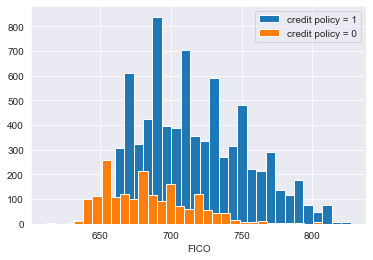

In [14]:
sns.set_style('darkgrid')
plt.hist(ds['fico'].loc[ds['credit.policy']==1],bins = 30 , label = 'credit policy = 1')
plt.hist(ds['fico'].loc[ds['credit.policy']==0],bins = 30 , label = 'credit policy = 0')
plt.legend()
plt.xlabel('FICO')



plotting not fully paid feature vs the FICO score:



Text(0.5, 0, 'FICO')

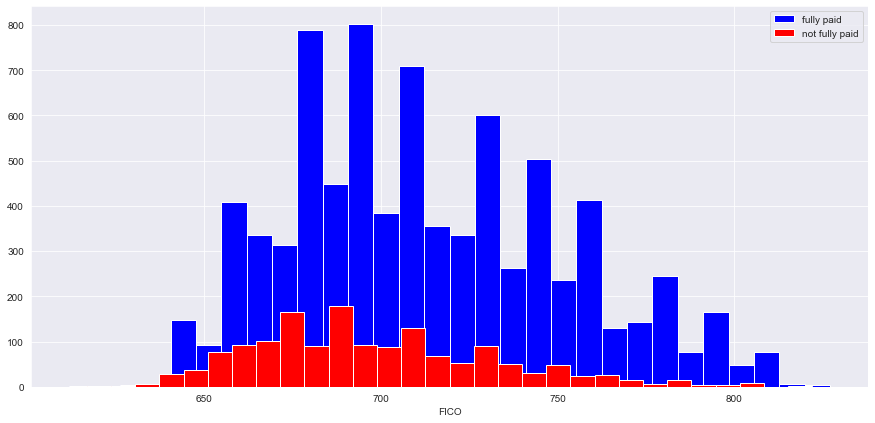

In [15]:
plt.figure(figsize=(15,7))
plt.hist(ds['fico'].loc[ds['not.fully.paid']==0],bins = 30 , label = 'fully paid',color = 'blue')
plt.hist(ds['fico'].loc[ds['not.fully.paid']==1],bins = 30  , label = 'not fully paid',color='red')

plt.legend()
plt.xlabel('FICO')


the inference here is that the count of people who have paid back all the loans is comparitively very high than those
who have defaulted on the loan repayment


<AxesSubplot:xlabel='purpose', ylabel='count'>

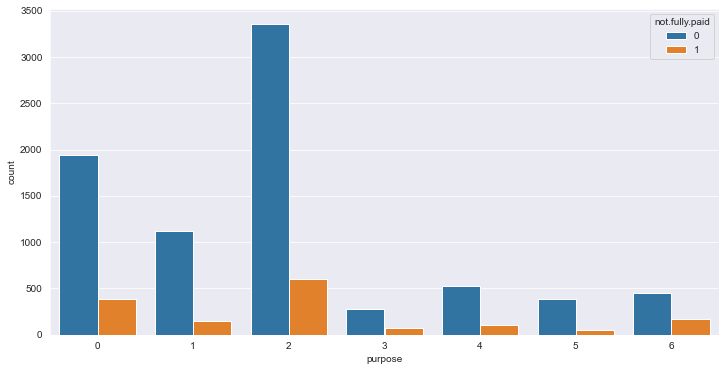

In [16]:
#creating a countplot to see the counts of purpose of loans by not.fully.paid
plt.figure(figsize=(12,6))
sns.countplot(data=ds, x='purpose', hue='not.fully.paid')

# Plotting corelation heatmap to understand the relation between features

In [17]:
num_features = ds.select_dtypes(include=[np.number])
cate_features = ds.select_dtypes(include=[np.object])
print(num_features)

      credit.policy  purpose  int.rate  installment    dti  fico  revol.bal  \
0                 1        2    0.1189       829.10  19.48   737      28854   
1                 1        1    0.1071       228.22  14.29   707      33623   
2                 1        2    0.1357       366.86  11.63   682       3511   
3                 1        2    0.1008       162.34   8.10   712      33667   
4                 1        1    0.1426       102.92  14.97   667       4740   
...             ...      ...       ...          ...    ...   ...        ...   
9573              0        0    0.1461       344.76  10.39   672     215372   
9574              0        0    0.1253       257.70   0.21   722        184   
9575              0        2    0.1071        97.81  13.09   687      10036   
9576              0        4    0.1600       351.58  19.18   692          0   
9577              0        2    0.1392       853.43  16.28   732      37879   

      revol.util  inq.last.6mths  delinq.2yrs  pub.

C:\Users\sasta\AppData\Local\Temp\ipykernel_3012\96463662.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cate_features = ds.select_dtypes(include=[np.object])


In [18]:
correlation = ds.corr()
print(correlation['not.fully.paid'].sort_values(ascending=False))

not.fully.paid    1.000000
int.rate          0.159552
inq.last.6mths    0.149452
revol.util        0.082088
revol.bal         0.053699
installment       0.049955
pub.rec           0.048634
purpose           0.047907
dti               0.037362
delinq.2yrs       0.008881
fico             -0.149666
credit.policy    -0.158119
Name: not.fully.paid, dtype: float64


<AxesSubplot:>

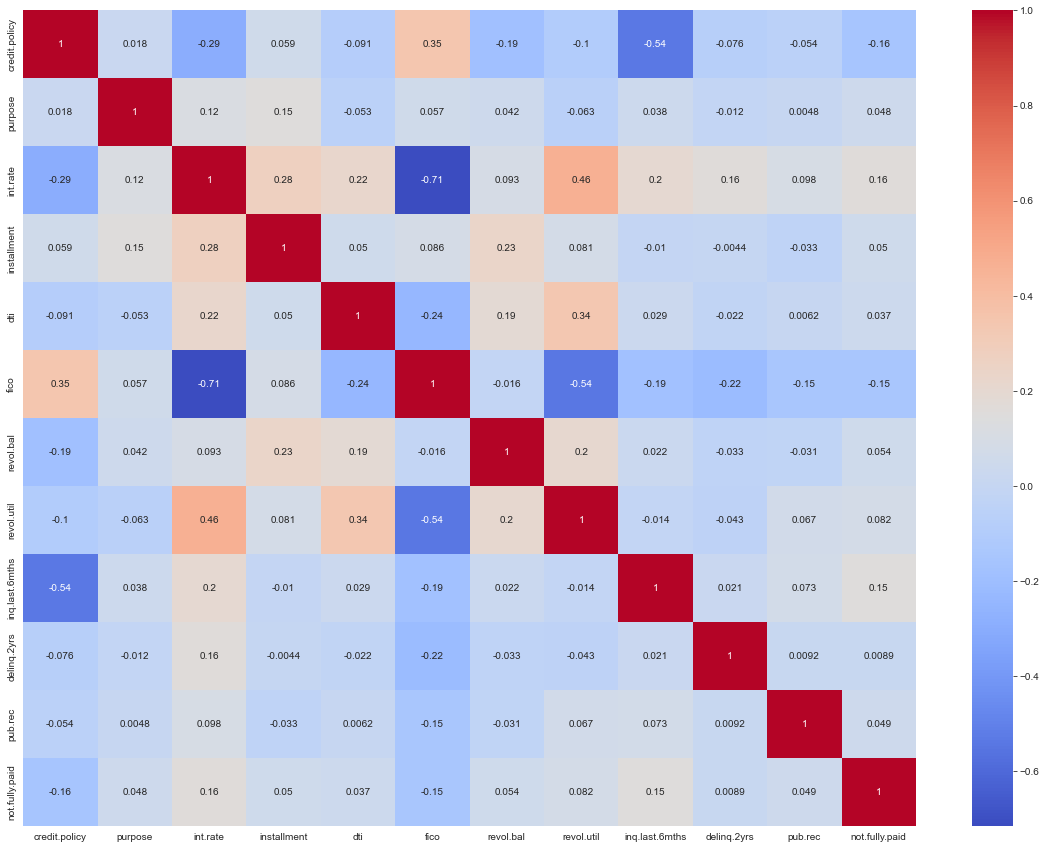

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation , cmap='coolwarm',annot=True)


# Splitting data into train and test sets

In [41]:
x = ds.iloc[: , :-1].values
y = ds.iloc[: , -1].values



In [46]:
x_train ,x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2)



# Running decision tree classifier model

In [84]:
#the max_depth value taken here is from trial and error within a range of 1-10
dt_clf = DecisionTreeClassifier(max_depth = 2)
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

In [85]:
#comparing the prediction results with the actual result of y_test
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


Printing the confusion matrix and accuracy score to check the model performance

In [86]:
cm = confusion_matrix(y_pred , y_test)
print('<---------confusion matrix of decision tree---------->')
print(cm)
print('\n')
print('<---------accuracy score of decision tree---------->')
acc = accuracy_score(y_pred , y_test)
print(acc)

<---------confusion matrix of decision tree---------->
[[1613  303]
 [   0    0]]


<---------accuracy score of decision tree---------->
0.8418580375782881


here we see that decision tree model performed well giving us an accuracy score of 84!

# Using Random forest classification model

In [93]:
#the n_estimators value taken here is based on my previous project experience!

rfc = RandomForestClassifier(n_estimators = 600)
rfc.fit(x_train , y_train)

y_pred = rfc.predict(x_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))


[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


In [94]:
print("<----------Confusion matrix for random forest classifier---------->")
cm = confusion_matrix(y_pred,y_test)
print(cm)
print('\n')
print(print("<----------accuracy score of random forest classifier---------->"))
acc = accuracy_score(y_pred , y_test)
print(acc)

<----------Confusion matrix for random forest classifier---------->
[[1598  295]
 [  15    8]]


<----------accuracy score of random forest classifier---------->
None
0.8382045929018789


Therefore ,  based on the accuracy scores of both the models we see that decision tree has performed much better and hence we should go with
the decision tree classifier model for further predictions.